# ECSE415 - Intro to Computer Vision
## Tutorial 4 - Feature Detection in OpenCV

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### need to install opencv-contrib-python

## run following command on your terminal
!pip install opencv-contrib-python==3.4.2.16

from google.colab import drive
drive.mount('/content/drive')

# make path = './' in-case you are running this locally
path = '/content/drive/My Drive/'

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==3.4.2.16 (from versions: 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56)
ERROR: No matching distribution found for opencv-contrib-python==3.4.2.16
Mounted at /content/drive


## Template Matching
- A technique used in computer vision for finding a sub-image of a target image which matches a template image.
- Technique is used widely in object detection such as,
- Manufacturing (as a part of quality control),
- Robotics (a way to navigate)
- Medical imaging (finding abnormalities),
- Or as a way to detect edges in images.

[ 89  89 121 121 137 138 138 138 152 153 153 153 154]
[296 297 296 297 297 296 297 298 296 295 296 297 296]


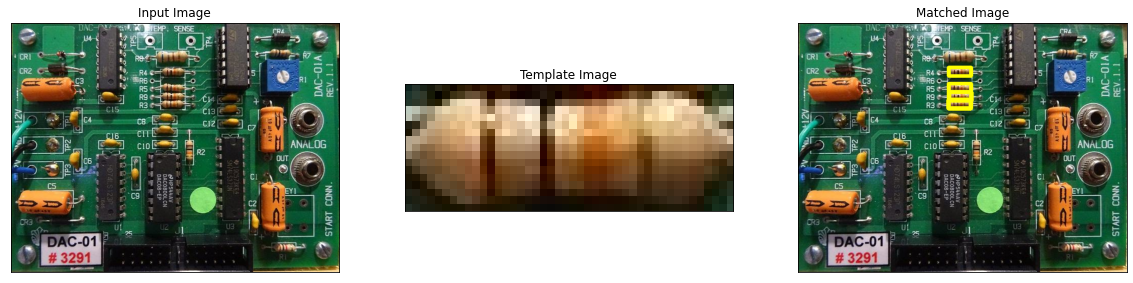

In [ ]:
#####################
# TEMPLATE MATCHING #
#####################

# load image
img = cv2.imread(path+"board.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# create copy
img_disp = img.copy()

# Read a template from one of the resistors
temp = cv2.imread(path+"template.png")
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)

ht, wt = temp.shape[0:2]

# apply template matching
# cv2.matchTemplate(image, templ, method) → result
# returns a list of [X,Y] where X= r

#The function slides through image , compares the overlapped patches of
#size w * h against templ using the specified method and stores the comparison results in result 

# method -> CV_TM_SQDIFF,           squared distance  
#           CV_TM_SQDIFF_NORMED,    normalized squared distance
#           CV_TM_CCORR,            cross correlation
#           CV_TM_CCORR_NORMED,     normalized cross correlation
#           CV_TM_CCOEFF,           cross coefficient 
#           CV_TM_CCOEFF_NORMED,    normalized cross coefficient  
# Ref: https://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html?highlight=matchtemplate
res = cv2.matchTemplate(img, temp, cv2.TM_CCOEFF_NORMED)

# set a threshold (need to tune it)
thres = 0.8
# find all points above threshold
loc = np.where(res >= thres)

print(loc[0])
print(loc[1])

# loop though the points
for pt in zip(*loc[::-1]):
    # print(pt)
    # cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None
    cv2.rectangle(img_disp, pt, (pt[0]+wt, pt[1]+ht), (255,255,0), 5)

# display images
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(temp)
plt.title("Template Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_disp)
plt.title("Matched Image"), plt.xticks([]), plt.yticks([])
plt.show()

## Histograms
- Image histograms refers to a histogram of the pixel intensity values of an image.
- A graph showing the number of pixels in an image at each different intensity value.
- For 8-bit grayscale there are 256 different possible intensities, thus the histogram will display the distribution of pixels amongst these values.
- Histograms of RGB images can be shown as either individual histograms of red, green and blue channels.
- Or a 3-D histogram with the three axes representing red, blue and green.

Image pixel count = 150100
hist_gray pixel count = [150100.]
hist_color[R] pixel count = [150100.]
hist_color[G] pixel count = [150100.]
hist_color[B] pixel count = [150100.]


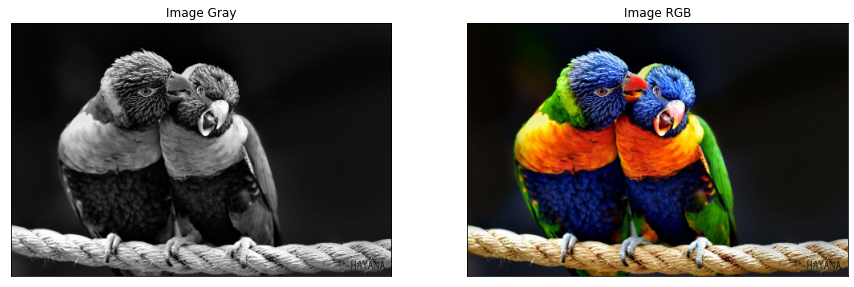

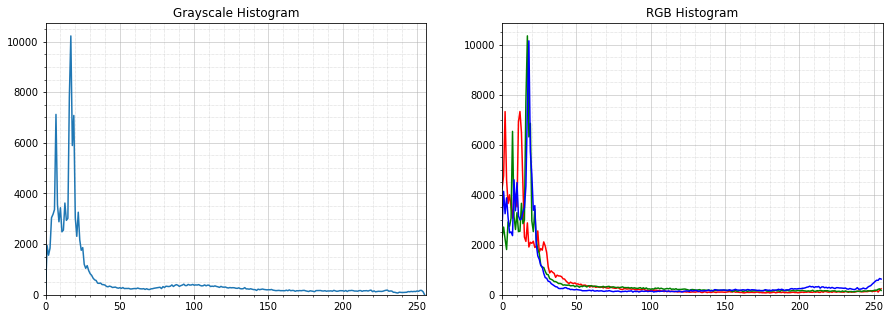

In [ ]:
####################
# IMAGE HISTOGRAMS #
####################

# load the image
img = cv2.imread(path+"bird.png")

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# compute histogram for grayscale image
# cv2.calcHist(image, channels, mask, histSize, ranges)
hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0,256])

# compute histogram for each RGB channel

hist_color = []
for i in range(0, img.shape[2]):
    hist_color.append(cv2.calcHist([img], [i], None, [256], [0,256]))

print("Image pixel count = " + str(img.shape[0]*img.shape[1]))
print("hist_gray pixel count = " + str(sum(hist_gray)))
print("hist_color[R] pixel count = " + str(sum(hist_color[0])))
print("hist_color[G] pixel count = " + str(sum(hist_color[1])))
print("hist_color[B] pixel count = " + str(sum(hist_color[2])))
    
# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display image
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img_gray, cmap="gray")
plt.title("Image Gray"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img)
plt.title("Image RGB"), plt.xticks([]), plt.yticks([])
plt.show()

# display histograms
plt.figure(figsize=(15,5))
plt.subplot(121), plt.plot(hist_gray)
plt.title("Grayscale Histogram"), plt.xlim([0, 256]), plt.ylim(0)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')     

plt.subplot(122)
colors = ['r', 'g', 'b']
for i in range(0, img.shape[2]):
    plt.plot(hist_color[i], color=colors[i])
plt.title("RGB Histogram"), plt.xlim([0,256]), plt.ylim(0)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')     
plt.show()


## Feature Detection and Description

Before Normalization
-0.04
0.08114351


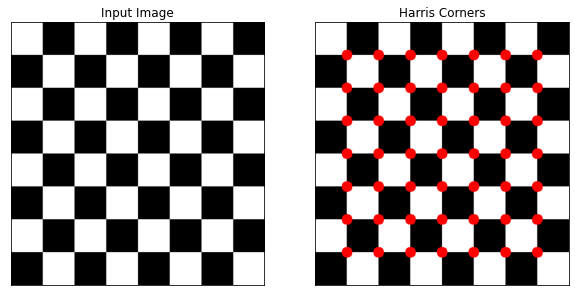

In [4]:
##########################
# HARRIS CORNER DETECTOR #
##########################

# load image as grayscale
img = cv2.imread(path+"chessboard.png")

# copy image
img_disp = img.copy()

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect harris corners
# cv2.cornerHarris(src, blocksize, sobelKernelSize, Harris_k)
#                  src --> image for harris corener detection
#                  blocksize --> accumulates derivatives (Entries of H matrix) over a neighbourhood.
#                  sobelkernalsize --> size of sobel kernel
#                  harris_k --> K hyperparameter of harris corner detector

corners = cv2.cornerHarris(img_gray, 2, 3, 0.04)

print("Before Normalization")
print(np.min(corners))
print(np.max(corners))

# normalize corner map [0,1]
# cv2.normalize(src, dst, alpha, beta, norm_type)
# min_I(dst(I)) = alpha, max_I(dst(I)) = beta
cv2.normalize(corners, corners, 0, 1, cv2.NORM_MINMAX)

# print("After Normalization")
# print(np.min(corners))
# print(np.max(corners))

# threshold for an optimal value
thres = 0.5

# list all points higher than threshold
loc = np.where(corners >= thres)

# print("shape of cornerness function output -- same as image: ", corners.shape)
# print("X axis of corners after thresholding: ", loc[0].shape)
# print("Y axis of corners after thresholding: ", loc[1].shape)
# print("First 9 corners -- X-axis location: ", loc[0][0:9])
# print("First 9 corners -- Y-axis location: ", loc[1][0:9])
# print("First 9 corners -- cornerness function output: ",corners[loc[0][0:9], loc[1][0:9]])

# loop though points
for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
    cv2.circle(img_disp, pt, 15, (255,0,0), -1)

# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()

## SIFT Features and Descriptors

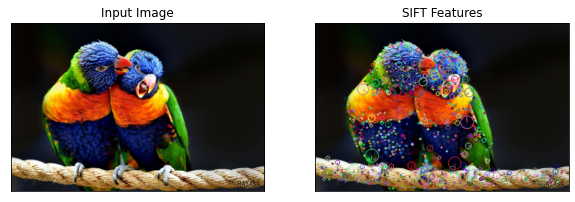

Num keypoints: 870


In [ ]:

#########################
# SIFT FEATURE DETECTOR #
#########################
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load image 
img = cv2.imread(path+"bird.png")

# copy image
img_disp = img.copy()

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)

# create a SIFT object
# Ref: https://docs.opencv.org/master/d7/d60/classcv_1_1SIFT.html
# SIFT::CREATE(	nfeatures = 0, nOctaveLayers = 3, contrastThreshold = 0.04, edgeThreshold = 10, sigma = 1.6)
# nfeatures	--> The number of best features to retain. The features are ranked by their scores (measured in SIFT algorithm as the local contrast)
# nOctaveLayers -->	The number of layers in each octave. 3 is the value used in D. Lowe paper. The number of octaves is computed automatically from the image resolution.
# contrastThreshold --> The contrast threshold used to filter out weak features in semi-uniform (low-contrast) regions. The larger the threshold, the less features are produced by the detector.
# edgeThreshold	--> The threshold used to filter out edge-like features. Note that the its meaning is different from the contrastThreshold, i.e. the larger the edgeThreshold, the less features are filtered out (more features are retained).
# sigma	--> The sigma of the Gaussian applied to the input image at the octave #0. If your image is captured with a weak camera with soft lenses, you might want to reduce the number.
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features, with no masks
# Ref: https://docs.opencv.org/master/d0/d13/classcv_1_1Feature2D.html#aa4e9a7082ec61ebc108806704fbd7887
# SIFT::DETECT(IMAGE, MAKS)
# Image --> Image for which we want to detect SIFT points
# mask -->	Mask specifying where to look for keypoints (optional). It must be a 8-bit integer matrix with non-zero values in the region of interest.

keypoints = sift.detect(img, None)

# draw the keypoints
# Ref: https://docs.opencv.org/3.4/d4/d5d/group__features2d__draw.html#gab958f8900dd10f14316521c149a60433
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# display
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.show()

# num of SIFT keypoints
print('Num keypoints: '+ str(len(keypoints)))

descriptors size: (780, 128)


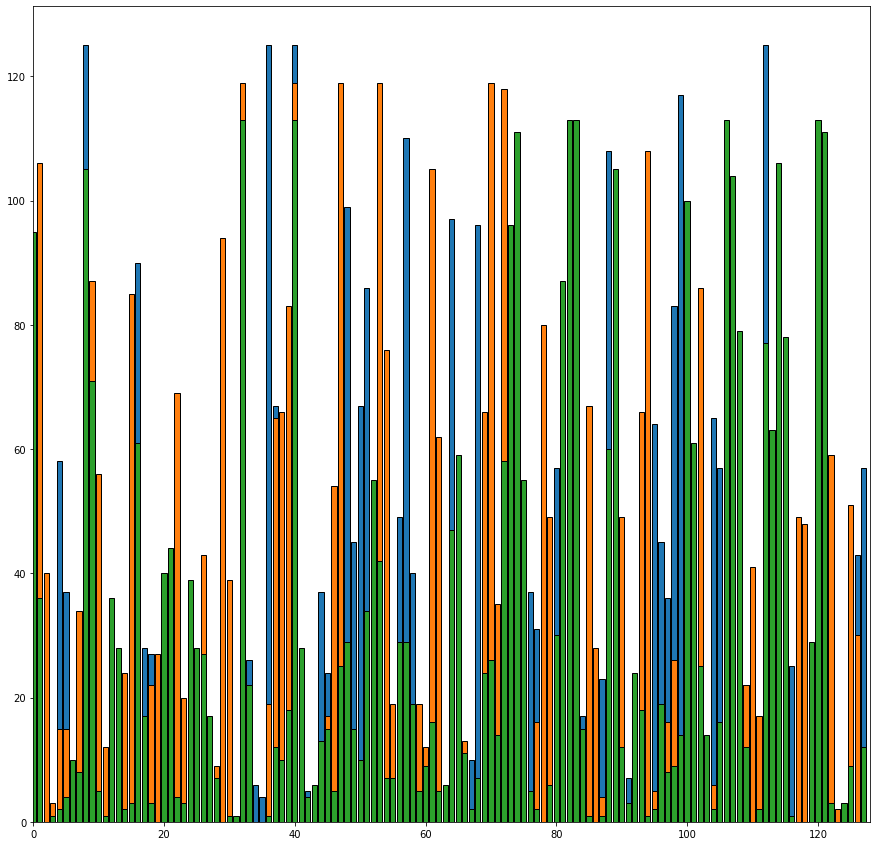

In [ ]:
####################
# SIFT DESCRIPTORS #
####################

# load image 
img = cv2.imread(path+"bird.png")

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features, with no masks
keypoints = sift.detect(img, None)

# compute SIFT descriptors
keypoints, descriptors = sift.compute(img, keypoints)

# Alternatively, we can use keypoints,descriptors = sift.detectAndCompute(gray,None) to get both

# num of SIFT keypoints/descriptors
print('descriptors size: '+ str(descriptors.shape))

# plot a couple of 1x128 SIFT descriptors
num = 3
plt.figure(figsize=(15,15))
for i in range(num):
    # plot the 128x1 np array using matplotlib plot()
    # plt.plot(descriptors[i], marker='o', linestyle='-')
    plt.bar(np.arange(0,128),descriptors[i], edgecolor='k' )
    plt.xlim([0,128]) # set x-axis limit
plt.show()

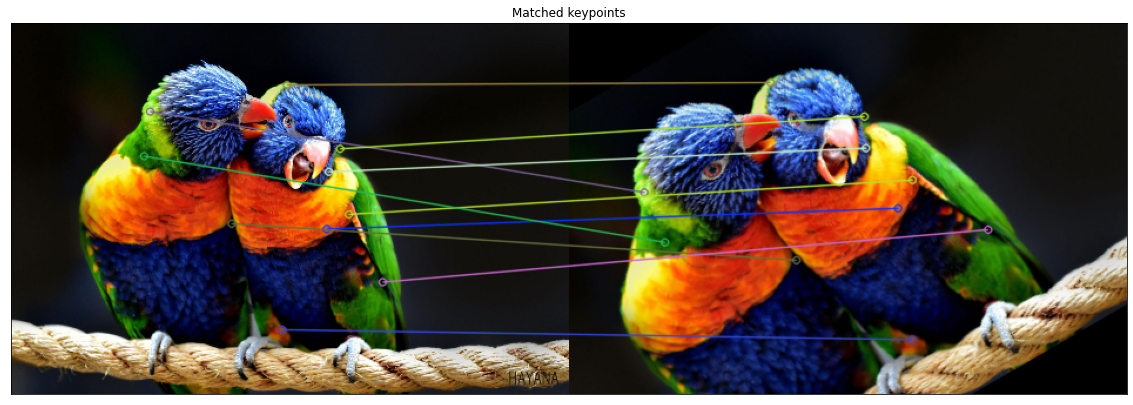

In [ ]:
####################
# FEATURE MATCHING #
####################

# load the image 
img1 = cv2.imread(path+"bird.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

height, width = img1.shape[0:2] # image size

# Create a rotated, scaled duplicate
# rotation marix around the center pixel, 30 degrees,scale of 1.2
# cv2.getRotationMatrix2d(center, angle, scale)
# center --> Center of the rotation in the source image.
# angle	--> Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
# scale	--> Isotropic scale factor.
# Ref: https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326

M = cv2.getRotationMatrix2D((width/2,height/2),30,1.2)


# Apply the transformation matrix
# dst = cv2.warpAffine(src, M, dsize, flags, boarderMode, borderValue)
# src --> input image.
# dst --> output image that has the size dsize and the same type as src .
# M --> 2×3 transformation matrix.
# dsize --> size of the output image.
# flags	--> combination of interpolation methods (see InterpolationFlags) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( dst→src ).
# borderMode --> pixel extrapolation method (see BorderTypes); when borderMode=BORDER_TRANSPARENT, it means that the pixels in the destination image corresponding to the "outliers" in the source image are not modified by the function.
# borderValue --> value used in case of a constant border; by default, it is 0.
# Ref: https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983
img2 = cv2.warpAffine(img1,M,(width,height))

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img1,None)
keypoints2,descriptors2 = sift.detectAndCompute(img2,None)

# create BFMatcher object
# bf = cv2.BFMatcher(normType = NORM_L2, crossCheck=False)
# normTyp --> One of NORM_L1, NORM_L2, NORM_HAMMING, NORM_HAMMING2. 
#             L1 and L2 norms are preferable choices for SIFT and SURF descriptors, 
#             NORM_HAMMING should be used with ORB, BRISK and BRIEF, NORM_HAMMING2 should be used with 
#             ORB when WTA_K==3 or 4 (see ORB::ORB constructor description).
# crossCheck --> If it is false, this is will be default BFMatcher behaviour when it finds the k nearest neighbors for each query descriptor. 
#                If crossCheck==true, then the knnMatch() method with k=1 will only return pairs (i,j) such that for i-th query descriptor the 
#                j-th descriptor in the matcher's collection is the nearest and vice versa, i.e. the BFMatcher will only return consistent pairs. 
#                Such technique usually produces best results with minimal number of outliers when there are enough matches. This is alternative to the ratio test, used by D. Lowe in SIFT paper.
# Ref: https://docs.opencv.org/3.4/d3/da1/classcv_1_1BFMatcher.html#ac6418c6f87e0e12a88979ea57980c020
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(descriptors1,descriptors2) #query image, train image

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,keypoints1,img2,keypoints2, matches[:10], None, flags=2)

plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.title("Matched keypoints"), plt.xticks([]), plt.yticks([])
plt.show()

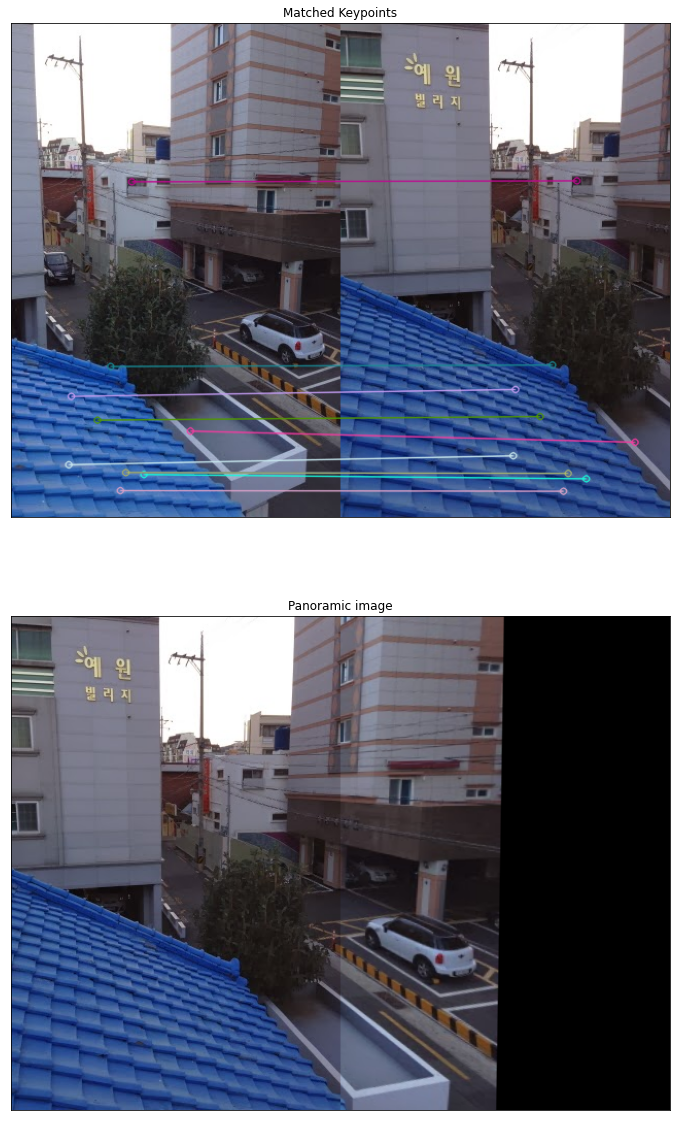

In [ ]:
# Read images to stitch
imgl = cv2.imread(path+'S1.jpg')
imgr = cv2.imread(path+'S2.jpg')

imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
imgr = cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)

# Compute keypoints and descriptors
sift_obj = cv2.xfeatures2d.SIFT_create()
keypoints_l, descriptors_l = sift_obj.detectAndCompute(imgl, None)
keypoints_r, descriptors_r = sift_obj.detectAndCompute(imgr, None)

# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.match(descriptors_r,descriptors_l) # query image, train image

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw keypoints 
imgmatch = cv2.drawMatches(imgr,keypoints_r,imgl,keypoints_l, matches[:10], None, flags=2)

# Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches):
    if m.distance < 1000:
        GoodMatches.append((m.trainIdx, m.queryIdx))

mpr = np.float32([keypoints_r[i].pt for (__, i) in GoodMatches])
mpl = np.float32([keypoints_l[i].pt for (i, __) in GoodMatches])

# find homography and wrap image accordingly

# cv.FindHomography(srcPoints, dstPoints, H, method=0, ransacReprojThreshold=3.0, status=None)
# Parameters:	
# srcPoints – Coordinates of the points in the original plane, a matrix of the type CV_32FC2 or vector<Point2f> .
# dstPoints – Coordinates of the points in the target plane, a matrix of the type CV_32FC2 or a vector<Point2f> .
# method – Method used to computed a homography matrix. The following methods are possible:
#          0 - a regular method using all the points
#          CV_RANSAC - RANSAC-based robust method
#          CV_LMEDS - Least-Median robust method
# ransacReprojThreshold – Maximum allowed reprojection error to treat a point pair as an inlier (used in the RANSAC method only). That is, if 
#                         | dstPoints_i -  convertPointsHomogeneous( H * srcPoints_i) |  >  ransacReprojThreshold
#                         then the point i is considered an outlier. If srcPoints and dstPoints are measured in pixels, it usually makes sense to set this parameter somewhere in the range of 1 to 10.
# mask – Optional output mask set by a robust method ( CV_RANSAC or CV_LMEDS ). Note that the input mask values are ignored.
# Ref: https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#findhomography
H, __ = cv2.findHomography(mpr, mpl, cv2.RANSAC, 4)

# Ref: https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87
# dst = cv2.warpPerspective(src, M, dsize, flags, boaderMode, boarderValue)
# src --> input image.
# dst --> output image that has the size dsize and the same type as src .
# M	--> 3×3 transformation matrix.
# dsize --> size of the output image.
# flags --> combination of interpolation methods (INTER_LINEAR or INTER_NEAREST) and the optional flag WARP_INVERSE_MAP, that sets M as the inverse transformation ( dst→src ).
# borderMode --> pixel extrapolation method (BORDER_CONSTANT or BORDER_REPLICATE).
# borderValue --> value used in case of a constant border; by default, it equals 0.
wimg = cv2.warpPerspective(imgr, H, (imgr.shape[1]+imgl.shape[1],imgr.shape[0]))
wimg[:,:imgl.shape[1],:] = imgl

plt.figure(figsize=(20,20))
plt.subplot(211)
plt.imshow(imgmatch)
plt.title("Matched Keypoints"), plt.xticks([]), plt.yticks([])
plt.subplot(212)
plt.imshow(wimg)
plt.title("Panoramic image"), plt.xticks([]), plt.yticks([])
plt.show()